          time     theta      H_ad      M_ad      M_dc
0     2.087272  0.189325  0.692073 -1.005875 -0.860418
1     2.087618  0.189362  0.692187 -1.001640 -0.860227
2     2.086120  0.189460  0.691692 -1.004578 -0.860113
3     2.087042  0.189609  0.691997 -1.006027 -0.860533
4     2.086235  0.189613  0.691730 -1.007134 -0.860494
...        ...       ...       ...       ...       ...
1995  2.084968  0.189598  0.691310 -1.006790 -0.857633
1996  2.084622  0.189546  0.691195 -1.005875 -0.857595
1997  2.085889  0.189533  0.691615 -1.001373 -0.857900
1998  2.083816  0.189438  0.690928 -1.000229 -0.857900
1999  2.084968  0.189369  0.691310 -0.996185 -0.857595

[2000 rows x 5 columns]
[ 557 1547]
{'Hc1': -0.3827879, 'Hc2': 0.3694177, 'Hc1_std': 0.0, 'Hc2_std': 0.0, 'Hc_mean': -0.3761028, 'Hc_std': -0.006685099999999999}


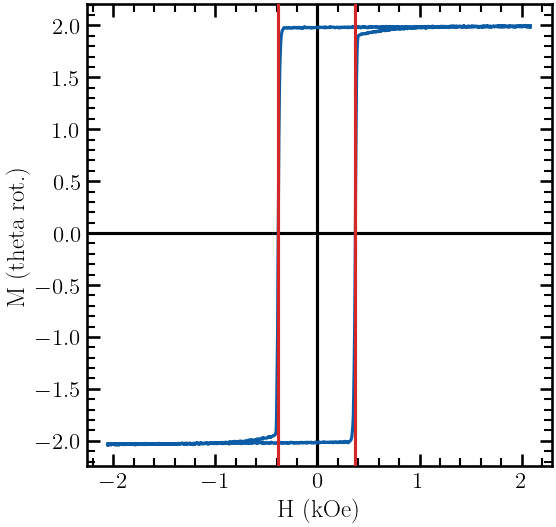

In [14]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
sns.set_palette('colorblind')

plt.style.use('science')
sns.set_context('talk')

folder = r'C:\Users\alexv\OneDrive - Imperial College London\Projects\Japan2024_May_KSAV\Japan_visit\P-AOMS\MOKE'
file = 'AOMS-CoPtsinglelayer-020424-MOKE.csv'
path = os.path.join(folder, file)
def read_uMOKE_data(path):
    data = pd.read_csv(path,names=['time','theta','H_ad','M_ad','M_dc'], header = 22, encoding = 'latin1')
    #data_ref = pd.read_csv(path, header=2033,encoding='latin1')
    return(data)

def plot_MOKE(data, fig = None, ax = None, Hcs=None):
    if fig == None or ax == None:
        fig,ax = plt.subplots(1,1)
    #ax.plot(data['H Signal'], data[' M Signal'])
    field, magnetization = data['time'], -1*(data['M_ad']-np.mean(data['M_ad']))
    #m_sig = -1*(data['M_ad']-np.mean(data['M_ad'])) #-1*(data['M_ad'])#-1*(data['M_ad']-np.mean(data['M_ad']))
    ax.plot(field,magnetization,'-')
    if Hcs!=None:
        ax.axvline(Hcs['Hc1'], zorder = 10, color = 'tab:red')
        ax.axvline(Hcs['Hc2'],zorder = 10, color = 'tab:red')

def find_coercive_field(data):
    field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
    zero_crossings = np.where(np.diff(np.signbit(magnetization)))[0]
    print(zero_crossings)
    x1 = np.where(field[zero_crossings]<0)
    x2 = np.where(field[zero_crossings]>0)
    Hc1 = np.mean(field[zero_crossings[x1]])
    Hc2 = np.mean(field[zero_crossings[x2]])
    Hc1_std = np.std(field[zero_crossings[x1]])
    Hc2_std = np.std(field[zero_crossings[x2]])
    Hcs_summary = {'Hc1':Hc1,'Hc2':Hc2,'Hc1_std':Hc1_std,'Hc2_std':Hc2_std,
                   'Hc_mean':(Hc1-Hc2)/2, 'Hc_std':(Hc1+Hc2)/2}
    return(Hcs_summary)
    
data = read_uMOKE_data(path)
#print(data_ref)
print(data)

Hcs_sum = find_coercive_field(data)
print(Hcs_sum)
#print(data)
#print(data.columns)

fig,ax = plt.subplots(1,1, figsize = (6,6))
plot_MOKE(data,fig,ax, Hcs=Hcs_sum)
ax.axvline(0, zorder = -10, color = 'k')
ax.axhline(0,zorder = -10, color = 'k')
ax.set_xlabel('H (kOe)')
ax.set_ylabel('M (theta rot.)')
plt.show()

          time     theta      H_ad      M_ad      M_dc
0     2.112044 -0.003653  0.700275  1.969482 -1.746242
1     2.113772 -0.003377  0.700847  1.969100 -1.746166
2     2.113772 -0.003167  0.700847  1.969787 -1.746242
3     2.112504 -0.002917  0.700427  1.967422 -1.746166
4     2.112850 -0.002924  0.700542  1.963340 -1.746128
...        ...       ...       ...       ...       ...
1995  2.118150 -0.004513  0.702296  1.996605 -1.740520
1996  2.117920 -0.004514  0.702220  1.991722 -1.740368
1997  2.117920 -0.004279  0.702220  1.999123 -1.741093
1998  2.117574 -0.004080  0.702106  1.992752 -1.740444
1999  2.117689 -0.003858  0.702144  1.999161 -1.740978

[2000 rows x 5 columns]
[ 548 1539]
{'Hc1': -0.3540481, 'Hc2': 0.3390632, 'Hc1_std': 0.0, 'Hc2_std': 0.0, 'Hc_mean': -0.34655565, 'Hc_std': -0.007492449999999984}


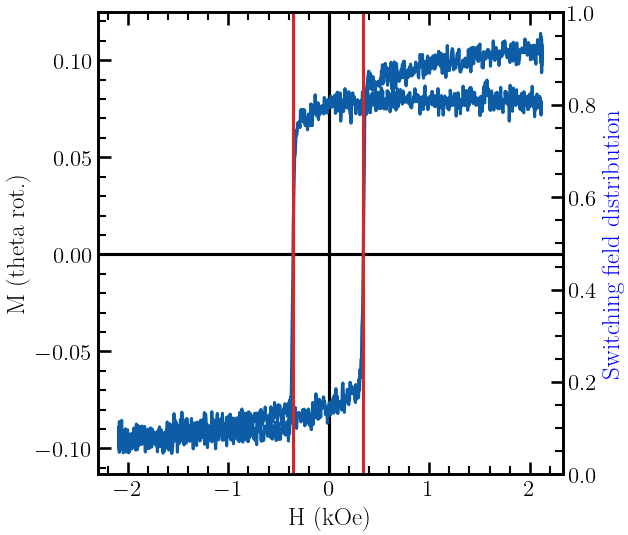

In [47]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
sns.set_palette('colorblind')

plt.style.use('science')
sns.set_context('talk')


folder = r'D:\Sendai\MOKE\AOMS-CoPt-Imp-nanodots'
file = 'AOMS-CoPy-Imp-nanodots01-pos2.csv'
path = os.path.join(folder, file)
def read_uMOKE_data(path):
    data = pd.read_csv(path,names=['time','theta','H_ad','M_ad','M_dc'], header = 22, encoding = 'latin1')
    #data_ref = pd.read_csv(path, header=2033,encoding='latin1')
    return(data)

def plot_MOKE(data, fig = None, ax = None, Hcs=None):
    if fig == None or ax == None:
        fig,ax = plt.subplots(1,1)
    #ax.plot(data['H Signal'], data[' M Signal'])
    field, magnetization = data['time'], (data['M_ad']-np.mean(data['M_ad']))
    #m_sig = -1*(data['M_ad']-np.mean(data['M_ad'])) #-1*(data['M_ad'])#-1*(data['M_ad']-np.mean(data['M_ad']))
    ax.plot(field,magnetization,'-')
    if Hcs!=None:
        ax.axvline(Hcs['Hc1'], zorder = 10, color = 'tab:red')
        ax.axvline(Hcs['Hc2'],zorder = 10, color = 'tab:red')

def find_coercive_field(data):
    field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
    zero_crossings = np.where(np.diff(np.signbit(magnetization)))[0]
    print(zero_crossings)
    x1 = np.where(field[zero_crossings]<0)
    x2 = np.where(field[zero_crossings]>0)
    Hc1 = np.mean(field[zero_crossings[x1]])
    Hc2 = np.mean(field[zero_crossings[x2]])
    Hc1_std = np.std(field[zero_crossings[x1]])
    Hc2_std = np.std(field[zero_crossings[x2]])
    Hcs_summary = {'Hc1':Hc1,'Hc2':Hc2,'Hc1_std':Hc1_std,'Hc2_std':Hc2_std,
                   'Hc_mean':(Hc1-Hc2)/2, 'Hc_std':(Hc1+Hc2)/2}
    return(Hcs_summary)

def switching_field_distribution(data, fig = None, ax = None, Hcs=None):
    field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
    mag_diff = np.diff(magnetization)
    ax.plot(field[0:-1],mag_diff,'b-')
    if Hcs!=None:
        ax.axvline(Hcs['Hc1'], zorder = 10, color = 'tab:red')
        ax.axvline(Hcs['Hc2'],zorder = 10, color = 'tab:red')
    
data = read_uMOKE_data(path)
#print(data_ref)
print(data)

Hcs_sum = find_coercive_field(data)
print(Hcs_sum)
#print(data)
#print(data.columns)

fig,ax = plt.subplots(1,1, figsize = (6,6))
plot_MOKE(data,fig,ax, Hcs=Hcs_sum)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'b'
#color = 'tab:blue'
ax2.set_ylabel('Switching field distribution', color=color)  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color)
#ax2.tick_params(axis='y', labelcolor=color)
#switching_field_distribution(data,fig,ax2, Hcs=None)
ax.axvline(0, zorder = -10, color = 'k')
ax.axhline(0,zorder = -10, color = 'k')
ax.set_xlabel('H (kOe)')
ax.set_ylabel('M (theta rot.)')
#ax.set_ylim(-2,2)
plt.show()

          time     theta      H_ad      M_ad      M_dc
0     2.112274 -0.007831  0.700351  1.997788 -1.376554
1     2.112504 -0.008003  0.700427  1.988556 -1.376097
2     2.111007 -0.008153  0.699931  1.992485 -1.376440
3     2.112044 -0.008419  0.700275  2.003700 -1.376516
4     2.111122 -0.008354  0.699970  1.993324 -1.376669
...        ...       ...       ...       ...       ...
1995  2.116998 -0.007021  0.701915  1.981537 -1.382620
1996  2.116767 -0.007025  0.701839  1.975013 -1.382925
1997  2.117228 -0.007198  0.701991  1.981575 -1.382734
1998  2.116076 -0.007345  0.701610  1.983177 -1.382429
1999  2.117113 -0.007512  0.701953  1.979820 -1.382658

[2000 rows x 5 columns]
[ 548 1540]
{'Hc1': -0.3546252, 'Hc2': 0.3432182, 'Hc1_std': 0.0, 'Hc2_std': 0.0, 'Hc_mean': -0.3489217, 'Hc_std': -0.0057035}


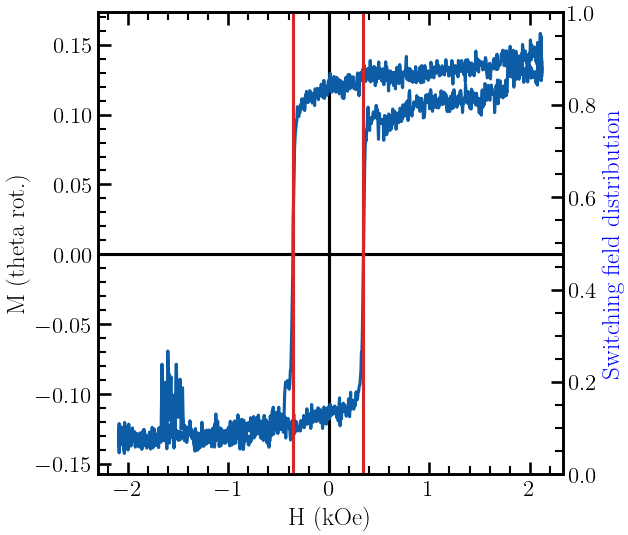

In [49]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
sns.set_palette('colorblind')

plt.style.use('science')
sns.set_context('talk')


folder = r'C:\Users\alexv\OneDrive - Imperial College London\Projects\Japan2024_May_KSAV\Japan_visit\P-AOMS\MOKE\AOMS-CoPt-Imp-nanodots'
file = 'AOMS-CoPy-Imp-nanodots01-pos3.csv'
path = os.path.join(folder, file)
def read_uMOKE_data(path):
    data = pd.read_csv(path,names=['time','theta','H_ad','M_ad','M_dc'], header = 22, encoding = 'latin1')
    #data_ref = pd.read_csv(path, header=2033,encoding='latin1')
    return(data)

def plot_MOKE(data, fig = None, ax = None, Hcs=None):
    if fig == None or ax == None:
        fig,ax = plt.subplots(1,1)
    #ax.plot(data['H Signal'], data[' M Signal'])
    field, magnetization = data['time'], (data['M_ad']-np.mean(data['M_ad']))
    #m_sig = -1*(data['M_ad']-np.mean(data['M_ad'])) #-1*(data['M_ad'])#-1*(data['M_ad']-np.mean(data['M_ad']))
    ax.plot(field,magnetization,'-')
    if Hcs!=None:
        ax.axvline(Hcs['Hc1'], zorder = 10, color = 'tab:red')
        ax.axvline(Hcs['Hc2'],zorder = 10, color = 'tab:red')

def find_coercive_field(data):
    field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
    zero_crossings = np.where(np.diff(np.signbit(magnetization)))[0]
    print(zero_crossings)
    x1 = np.where(field[zero_crossings]<0)
    x2 = np.where(field[zero_crossings]>0)
    Hc1 = np.mean(field[zero_crossings[x1]])
    Hc2 = np.mean(field[zero_crossings[x2]])
    Hc1_std = np.std(field[zero_crossings[x1]])
    Hc2_std = np.std(field[zero_crossings[x2]])
    Hcs_summary = {'Hc1':Hc1,'Hc2':Hc2,'Hc1_std':Hc1_std,'Hc2_std':Hc2_std,
                   'Hc_mean':(Hc1-Hc2)/2, 'Hc_std':(Hc1+Hc2)/2}
    return(Hcs_summary)

def switching_field_distribution(data, fig = None, ax = None, Hcs=None):
    field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
    mag_diff = np.diff(magnetization)
    ax.plot(field[0:-1],mag_diff,'b-')
    if Hcs!=None:
        ax.axvline(Hcs['Hc1'], zorder = 10, color = 'tab:red')
        ax.axvline(Hcs['Hc2'],zorder = 10, color = 'tab:red')
    
data = read_uMOKE_data(path)
#print(data_ref)
print(data)

Hcs_sum = find_coercive_field(data)
print(Hcs_sum)
#print(data)
#print(data.columns)

fig,ax = plt.subplots(1,1, figsize = (6,6))
plot_MOKE(data,fig,ax, Hcs=Hcs_sum)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'b'
#color = 'tab:blue'
ax2.set_ylabel('Switching field distribution', color=color)  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color)
#ax2.tick_params(axis='y', labelcolor=color)
#switching_field_distribution(data,fig,ax2, Hcs=None)
ax.axvline(0, zorder = -10, color = 'k')
ax.axhline(0,zorder = -10, color = 'k')
ax.set_xlabel('H (kOe)')
ax.set_ylabel('M (theta rot.)')
#ax.set_ylim(-2,2)
plt.show()

          time     theta      H_ad      M_ad      M_dc
0     2.110891 -0.007453  0.699893  1.962921 -1.442855
1     2.112850 -0.007300  0.700542  1.958419 -1.442473
2     2.111583 -0.007198  0.700122  1.951476 -1.442550
3     2.111122 -0.007092  0.699970  1.964027 -1.443160
4     2.110776 -0.006910  0.699855  1.953994 -1.442779
...        ...       ...       ...       ...       ...
1995  2.116998 -0.008086  0.701915  1.965744 -1.429809
1996  2.117459 -0.008126  0.702068  1.965362 -1.429770
1997  2.116998 -0.008012  0.701915  1.955291 -1.429809
1998  2.116652 -0.007867  0.701801  1.950027 -1.430152
1999  2.117459 -0.007611  0.702068  1.951286 -1.429656

[2000 rows x 5 columns]
[ 548 1540]
{'Hc1': -0.3538173, 'Hc2': 0.3446032, 'Hc1_std': 0.0, 'Hc2_std': 0.0, 'Hc_mean': -0.34921025, 'Hc_std': -0.004607050000000001}


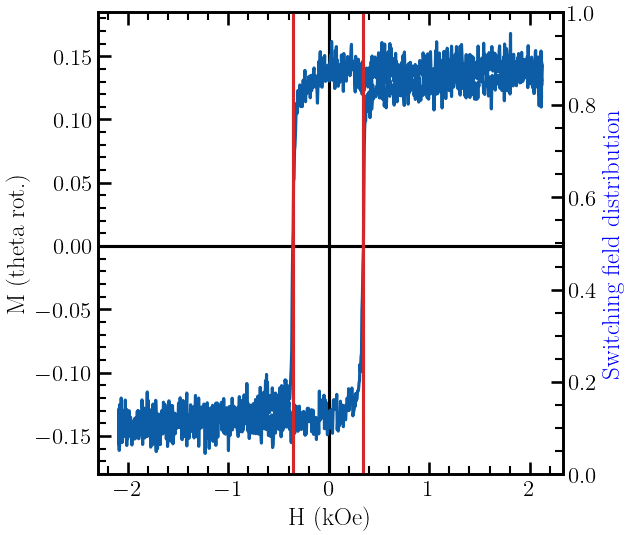

In [50]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
sns.set_palette('colorblind')

plt.style.use('science')
sns.set_context('talk')


folder = r'C:\Users\alexv\OneDrive - Imperial College London\Projects\Japan2024_May_KSAV\Japan_visit\P-AOMS\MOKE\AOMS-CoPt-Imp-nanodots'
file = 'AOMS-CoPy-Imp-nanodots01-pos4.csv'
path = os.path.join(folder, file)
def read_uMOKE_data(path):
    data = pd.read_csv(path,names=['time','theta','H_ad','M_ad','M_dc'], header = 22, encoding = 'latin1')
    #data_ref = pd.read_csv(path, header=2033,encoding='latin1')
    return(data)

def plot_MOKE(data, fig = None, ax = None, Hcs=None):
    if fig == None or ax == None:
        fig,ax = plt.subplots(1,1)
    #ax.plot(data['H Signal'], data[' M Signal'])
    field, magnetization = data['time'], (data['M_ad']-np.mean(data['M_ad']))
    #m_sig = -1*(data['M_ad']-np.mean(data['M_ad'])) #-1*(data['M_ad'])#-1*(data['M_ad']-np.mean(data['M_ad']))
    ax.plot(field,magnetization,'-')
    if Hcs!=None:
        ax.axvline(Hcs['Hc1'], zorder = 10, color = 'tab:red')
        ax.axvline(Hcs['Hc2'],zorder = 10, color = 'tab:red')

def find_coercive_field(data):
    field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
    zero_crossings = np.where(np.diff(np.signbit(magnetization)))[0]
    print(zero_crossings)
    x1 = np.where(field[zero_crossings]<0)
    x2 = np.where(field[zero_crossings]>0)
    Hc1 = np.mean(field[zero_crossings[x1]])
    Hc2 = np.mean(field[zero_crossings[x2]])
    Hc1_std = np.std(field[zero_crossings[x1]])
    Hc2_std = np.std(field[zero_crossings[x2]])
    Hcs_summary = {'Hc1':Hc1,'Hc2':Hc2,'Hc1_std':Hc1_std,'Hc2_std':Hc2_std,
                   'Hc_mean':(Hc1-Hc2)/2, 'Hc_std':(Hc1+Hc2)/2}
    return(Hcs_summary)

def switching_field_distribution(data, fig = None, ax = None, Hcs=None):
    field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
    mag_diff = np.diff(magnetization)
    ax.plot(field[0:-1],mag_diff,'b-')
    if Hcs!=None:
        ax.axvline(Hcs['Hc1'], zorder = 10, color = 'tab:red')
        ax.axvline(Hcs['Hc2'],zorder = 10, color = 'tab:red')
    
data = read_uMOKE_data(path)
#print(data_ref)
print(data)

Hcs_sum = find_coercive_field(data)
print(Hcs_sum)
#print(data)
#print(data.columns)

fig,ax = plt.subplots(1,1, figsize = (6,6))
plot_MOKE(data,fig,ax, Hcs=Hcs_sum)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'b'
#color = 'tab:blue'
ax2.set_ylabel('Switching field distribution', color=color)  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color)
#ax2.tick_params(axis='y', labelcolor=color)
#switching_field_distribution(data,fig,ax2, Hcs=None)
ax.axvline(0, zorder = -10, color = 'k')
ax.axhline(0,zorder = -10, color = 'k')
ax.set_xlabel('H (kOe)')
ax.set_ylabel('M (theta rot.)')
#ax.set_ylim(-2,2)
plt.show()

[[Model]]
    Model(gaussian_double)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 120
    # data points      = 1000
    # variables        = 6
    chi-square         = 1.82131508
    reduced chi-square = 0.00183231
    Akaike info crit   = -6296.19646
    Bayesian info crit = -6266.74993
    R-squared          = 0.01106320
[[Variables]]
    amp1:   -115.990118 +/- 296888.460 (255960.13%) (init = 1)
    cen1:   -0.28976686 +/- 795.130979 (274403.70%) (init = 2)
    sigma1:  208.554699 +/- 551079.648 (264237.46%) (init = 0.5)
    amp2:    115.999350 +/- 296888.479 (255939.78%) (init = 1)
    cen2:   -0.22525715 +/- 214.231131 (95105.14%) (init = 2)
    sigma2: -115.176197 +/- 145108.590 (125988.35%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp1, amp2)     = -1.000
    C(cen1, cen2)     = 0.869
    C(amp1, sigma2)   = 0.771
    C(amp2, sigma2)   = -0.771
    C(sigma1, sigma2) = -0.712
    C(cen1, sigma1)   = -0.395
    C(cen

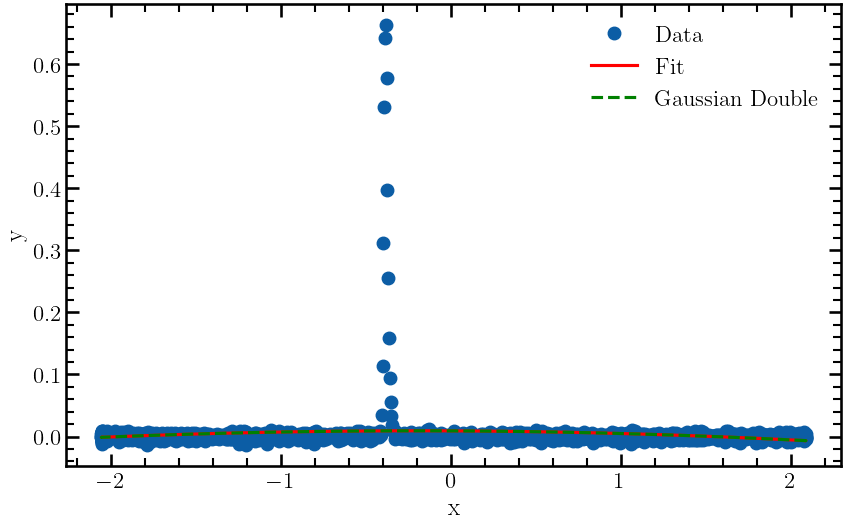

[[Model]]
    Model(lorentzian_single)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 126
    # data points      = 1000
    # variables        = 3
    chi-square         = 0.06878707
    reduced chi-square = 6.8994e-05
    Akaike info crit   = -9578.49483
    Bayesian info crit = -9563.77157
    R-squared          = 0.96265003
[[Variables]]
    amp:    0.73175997 +/- 0.00644478 (0.88%) (init = 5)
    cen:   -0.38369351 +/- 8.6523e-05 (0.02%) (init = 2)
    sigma:  0.00987117 +/- 1.2412e-04 (1.26%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, sigma) = -0.709


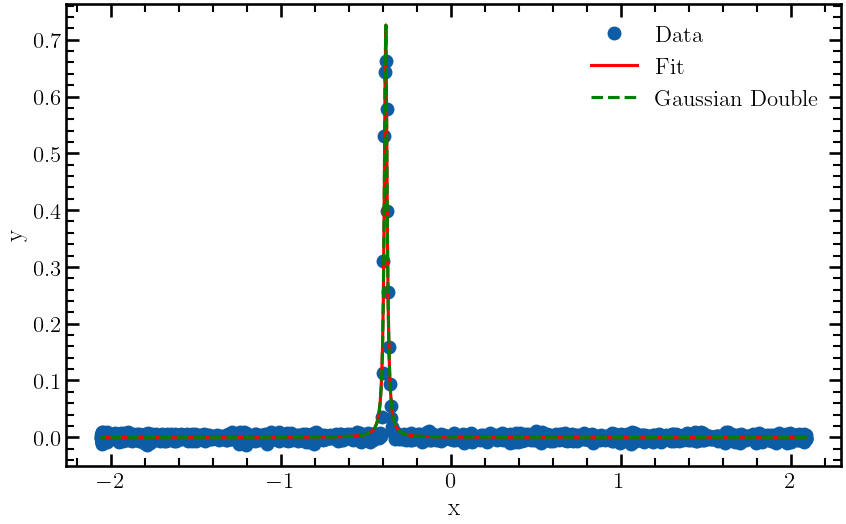

[[Model]]
    Model(gaussian_single)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 1000
    # variables        = 3
    chi-square         = 0.02908781
    reduced chi-square = 2.9175e-05
    Akaike info crit   = -10439.1914
    Bayesian info crit = -10424.4682
    R-squared          = 0.98420592
[[Variables]]
    amp:    0.67215709 +/- 0.00325917 (0.48%) (init = 0.7)
    cen:   -0.38358960 +/- 6.0720e-05 (0.02%) (init = -0.3836935)
    sigma: -0.01063568 +/- 5.9715e-05 (0.56%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, sigma) = 0.567


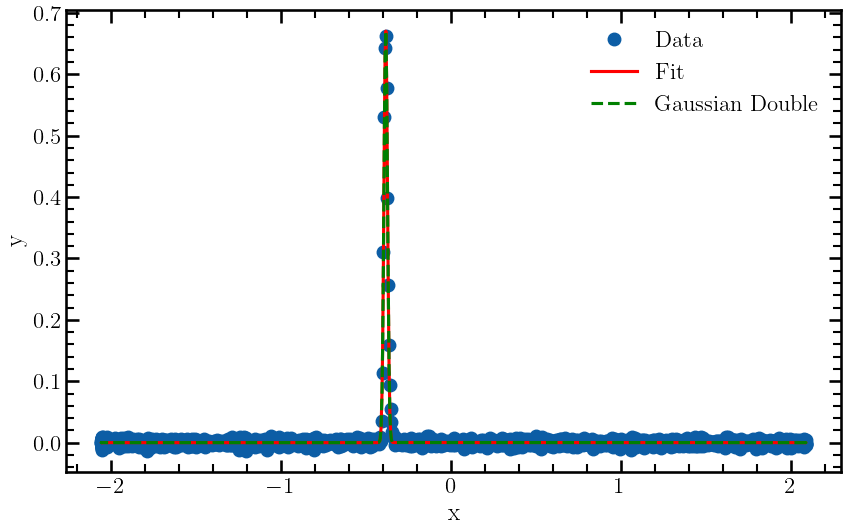

In [42]:
from lmfit import Model, Parameters

# Define the Gaussian function
def gaussian_double(x, amp1, cen1, sigma1,amp2, cen2, sigma2):
    return amp1 * np.exp(-(x - cen1)**2 / (2 * sigma1**2))+amp2 * np.exp(-(x - cen2)**2 / (2 * sigma2**2))

def gaussian_single(x, amp, cen, sigma):
    return amp * np.exp(-(x - cen)**2 / (2 * sigma**2))

def lorentzian_single(x, amp, cen, sigma):
    return amp * (sigma**2 / ((x - cen)**2 + sigma**2))

# Create the model
gmodel = Model(gaussian_double)

# Set the initial parameters
params = Parameters()
params.add('amp1', value=1)
params.add('cen1', value=2)
params.add('sigma1', value=0.5)
params.add('amp2', value=1)
params.add('cen2', value=2)
params.add('sigma2', value=0.5)
field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
mag_diff = np.diff(magnetization[0:-999])
x = field[0:-1000]
y = mag_diff

field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])

# Fit the model to the data
result = gmodel.fit(y, x=x, params=params)

# Print the fit results
print(result.fit_report())

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(x, result.best_fit, '-r', label='Fit')
plt.plot(x, gaussian_double(x, result.params['amp1'].value, result.params['cen1'].value, result.params['sigma1'].value,result.params['amp2'].value, result.params['cen2'].value, result.params['sigma2'].value), '--g', label='Gaussian Double')
#plt.plot(x, gaussian(x, result.params['amp2'].value, result.params['cen2'].value, result.params['sigma2'].value), '--b', label='Gaussian 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


gmodel = Model(lorentzian_single)

# Set the initial parameters
params = Parameters()
params.add('amp', value=5)
params.add('cen', value=2)
params.add('sigma', value=2)
field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
mag_diff = np.diff(magnetization[0:-999])
x = field[0:-1000]
y = mag_diff

field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])

# Fit the model to the data
result = gmodel.fit(y, x=x, params=params)

# Print the fit results
print(result.fit_report())

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(x, result.best_fit, '-r', label='Fit')
plt.plot(x, lorentzian_single(x, result.params['amp'].value, result.params['cen'].value, result.params['sigma'].value), '--g', label='Gaussian Double')
#plt.plot(x, gaussian(x, result.params['amp2'].value, result.params['cen2'].value, result.params['sigma2'].value), '--b', label='Gaussian 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

gmodel = Model(gaussian_single)

# Set the initial parameters
params = Parameters()
params.add('amp', value=0.7)
params.add('cen', value=-0.38369351)
params.add('sigma', value=0.1)
field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
mag_diff = np.diff(magnetization[0:-999])
x = field[0:-1000]
y = mag_diff

field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])

# Fit the model to the data
result = gmodel.fit(y, x=x, params=params)

# Print the fit results
print(result.fit_report())

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(x, result.best_fit, '-r', label='Fit')
plt.plot(x, gaussian_single(x, result.params['amp'].value, result.params['cen'].value, result.params['sigma'].value), '--g', label='Gaussian Double')
#plt.plot(x, gaussian(x, result.params['amp2'].value, result.params['cen2'].value, result.params['sigma2'].value), '--b', label='Gaussian 2')
plt.xlabel('H (kOe)')
plt.ylabel('dM')
plt.legend()
plt.show()

[[Model]]
    Model(gaussian_single)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 84
    # data points      = 999
    # variables        = 3
    chi-square         = 0.02724960
    reduced chi-square = 2.7359e-05
    Akaike info crit   = -10492.9616
    Bayesian info crit = -10478.2413
    R-squared          = 0.98468818
[[Variables]]
    amp:   -0.64943433 +/- 0.00309693 (0.48%) (init = 0.7)
    cen:    0.36899393 +/- 6.1999e-05 (0.02%) (init = -0.3836935)
    sigma: -0.01105082 +/- 6.0420e-05 (0.55%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, sigma) = -0.565


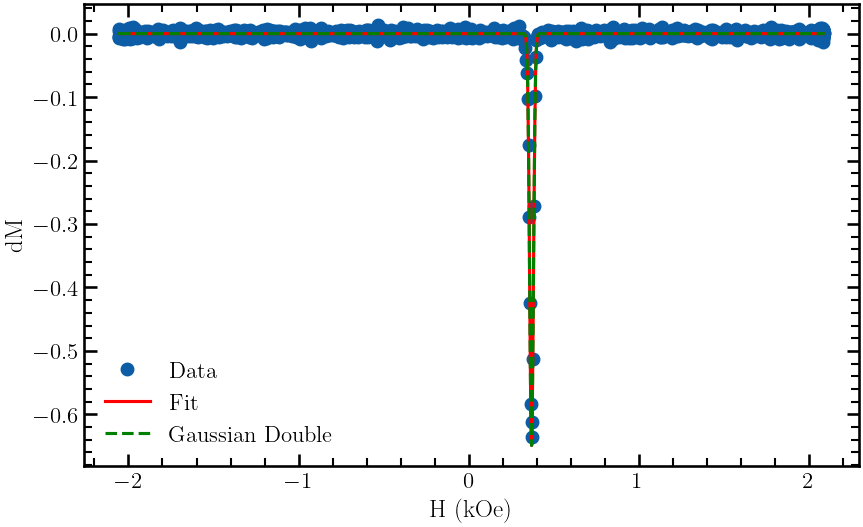

In [43]:
gmodel = Model(gaussian_single)

# Set the initial parameters
params = Parameters()
params.add('amp', value=0.7)
params.add('cen', value=-0.38369351)
params.add('sigma', value=0.1)
field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
mag_diff = np.diff(magnetization[1000:])
x = field[1000:-1]
y = mag_diff

field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])

# Fit the model to the data
result = gmodel.fit(y, x=x, params=params)

# Print the fit results
print(result.fit_report())

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(x, result.best_fit, '-r', label='Fit')
plt.plot(x, gaussian_single(x, result.params['amp'].value, result.params['cen'].value, result.params['sigma'].value), '--g', label='Gaussian Double')
#plt.plot(x, gaussian(x, result.params['amp2'].value, result.params['cen2'].value, result.params['sigma2'].value), '--b', label='Gaussian 2')
plt.xlabel('H (kOe)')
plt.ylabel('dM')
plt.legend()
plt.show()

          time     theta      H_ad      M_ad      M_dc
0     2.111237  0.251412  0.700008 -3.106699 -1.591096
1     2.111928  0.251480  0.700237 -3.109789 -1.590753
2     2.112044  0.251463  0.700275 -3.100252 -1.590906
3     2.111813  0.251454  0.700198 -3.102236 -1.590639
4     2.110085  0.251469  0.699626 -3.109636 -1.590715
...        ...       ...       ...       ...       ...
1995  2.117574  0.251206  0.702106 -3.083429 -1.585069
1996  2.116767  0.251220  0.701839 -3.083848 -1.584878
1997  2.116422  0.251253  0.701724 -3.088388 -1.584573
1998  2.117574  0.251321  0.702106 -3.092470 -1.584611
1999  2.117459  0.251361  0.702068 -3.092203 -1.584573

[2000 rows x 5 columns]
[ 583 1576]
{'Hc1': -0.5422954, 'Hc2': 0.5356107, 'Hc1_std': 0.0, 'Hc2_std': 0.0, 'Hc_mean': -0.5389530499999999, 'Hc_std': -0.003342349999999994}


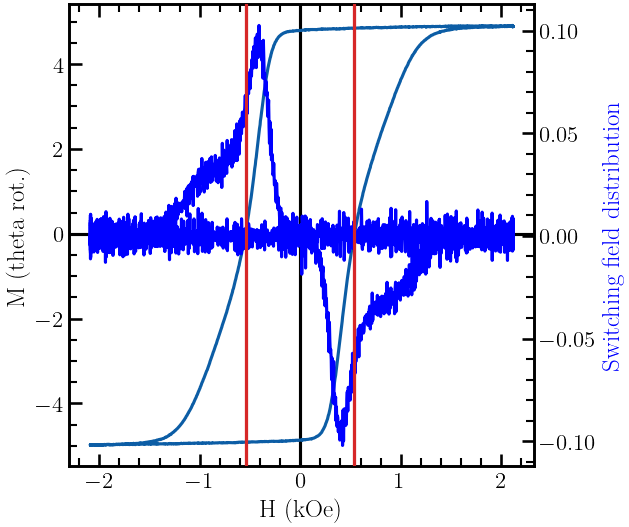

In [23]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
sns.set_palette('colorblind')

plt.style.use('science')
sns.set_context('talk')

folder = r'D:\Sendai\MOKE\AOMS-CoPt-multilayer-020424'
file = 'P-AOMS02-CoPt5x-020524-finer.csv'
path = os.path.join(folder, file)
def read_uMOKE_data(path):
    data = pd.read_csv(path,names=['time','theta','H_ad','M_ad','M_dc'], header = 22, encoding = 'latin1')
    #data_ref = pd.read_csv(path, header=2033,encoding='latin1')
    return(data)

def plot_MOKE(data, fig = None, ax = None, Hcs=None):
    if fig == None or ax == None:
        fig,ax = plt.subplots(1,1)
    #ax.plot(data['H Signal'], data[' M Signal'])
    field, magnetization = data['time'], -1*(data['M_ad']-np.mean(data['M_ad']))
    #m_sig = -1*(data['M_ad']-np.mean(data['M_ad'])) #-1*(data['M_ad'])#-1*(data['M_ad']-np.mean(data['M_ad']))
    ax.plot(field,magnetization,'-')
    if Hcs!=None:
        ax.axvline(Hcs['Hc1'], zorder = 10, color = 'tab:red')
        ax.axvline(Hcs['Hc2'],zorder = 10, color = 'tab:red')

def find_coercive_field(data):
    field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
    zero_crossings = np.where(np.diff(np.signbit(magnetization)))[0]
    print(zero_crossings)
    x1 = np.where(field[zero_crossings]<0)
    x2 = np.where(field[zero_crossings]>0)
    Hc1 = np.mean(field[zero_crossings[x1]])
    Hc2 = np.mean(field[zero_crossings[x2]])
    Hc1_std = np.std(field[zero_crossings[x1]])
    Hc2_std = np.std(field[zero_crossings[x2]])
    Hcs_summary = {'Hc1':Hc1,'Hc2':Hc2,'Hc1_std':Hc1_std,'Hc2_std':Hc2_std,
                   'Hc_mean':(Hc1-Hc2)/2, 'Hc_std':(Hc1+Hc2)/2}
    return(Hcs_summary)

def switching_field_distribution(data, fig = None, ax = None, Hcs=None):
    field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
    mag_diff = np.diff(magnetization)
    ax.plot(field[0:-1],mag_diff,'b-')
    if Hcs!=None:
        ax.axvline(Hcs['Hc1'], zorder = 10, color = 'tab:red')
        ax.axvline(Hcs['Hc2'],zorder = 10, color = 'tab:red')
    
data = read_uMOKE_data(path)
#print(data_ref)
print(data)

Hcs_sum = find_coercive_field(data)
print(Hcs_sum)
#print(data)
#print(data.columns)

fig,ax = plt.subplots(1,1, figsize = (6,6))
plot_MOKE(data,fig,ax, Hcs=Hcs_sum)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'b'
#color = 'tab:blue'
ax2.set_ylabel('Switching field distribution', color=color)  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color)
#ax2.tick_params(axis='y', labelcolor=color)
switching_field_distribution(data,fig,ax2, Hcs=Hcs_sum)
ax.axvline(0, zorder = -10, color = 'k')
ax.axhline(0,zorder = -10, color = 'k')
ax.set_xlabel('H (kOe)')
ax.set_ylabel('M (theta rot.)')
#ax.set_ylim(-2,2)
plt.show()

In [1]:
from lmfit import Model, Parameters

# Define the Gaussian function
def gaussian_double(x, amp1, cen1, sigma1,amp2, cen2, sigma2):
    return amp1 * np.exp(-(x - cen1)**2 / (2 * sigma1**2))+amp2 * np.exp(-(x - cen2)**2 / (2 * sigma2**2))

def gaussian_single(x, amp1, cen1, sigma1):
    return amp1 * np.exp(-(x - cen1)**2 / (2 * sigma1**2))

def lorentzian_single(x, amp, cen, sigma):
    return amp * (sigma**2 / ((x - cen)**2 + sigma**2))

# Create the model
gmodel = Model(gaussian_double)

# Set the initial parameters
params = Parameters()
params.add('amp1', value=1)
params.add('cen1', value=2)
params.add('sigma1', value=0.5)
params.add('amp2', value=1)
params.add('cen2', value=2)
params.add('sigma2', value=0.5)
field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
mag_diff = np.diff(magnetization[0:-999])
x = field[0:-1000]
y = mag_diff

field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])

# Fit the model to the data
result = gmodel.fit(y, x=x, params=params)

# Print the fit results
print(result.fit_report())

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(x, result.best_fit, '-r', label='Fit')
plt.plot(x, gaussian_double(x, result.params['amp1'].value, result.params['cen1'].value, result.params['sigma1'].value,result.params['amp2'].value, result.params['cen2'].value, result.params['sigma2'].value), '--g', label='Gaussian Double')
#plt.plot(x, gaussian(x, result.params['amp2'].value, result.params['cen2'].value, result.params['sigma2'].value), '--b', label='Gaussian 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


gmodel = Model(lorentzian_single)

# Set the initial parameters
params = Parameters()
params.add('amp', value=5)
params.add('cen', value=2)
params.add('sigma', value=2)
field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
mag_diff = np.diff(magnetization[0:-999])
x = field[0:-1000]
y = mag_diff

field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])

# Fit the model to the data
result = gmodel.fit(y, x=x, params=params)

# Print the fit results
print(result.fit_report())

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(x, result.best_fit, '-r', label='Fit')
plt.plot(x, lorentzian_single(x, result.params['amp'].value, result.params['cen'].value, result.params['sigma'].value), '--g', label='Gaussian Double')
#plt.plot(x, gaussian(x, result.params['amp2'].value, result.params['cen2'].value, result.params['sigma2'].value), '--b', label='Gaussian 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

gmodel = Model(lorentzian_single)

# Set the initial parameters
params = Parameters()
params.add('amp', value=5)
params.add('cen', value=2)
params.add('sigma', value=2)
field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
mag_diff = np.diff(magnetization[0:-999])
x = field[0:-1000]
y = mag_diff

field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])

# Fit the model to the data
result = gmodel.fit(y, x=x, params=params)

# Print the fit results
print(result.fit_report())

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(x, result.best_fit, '-r', label='Fit')
plt.plot(x, lorentzian_single(x, result.params['amp'].value, result.params['cen'].value, result.params['sigma'].value), '--g', label='Gaussian Double')
#plt.plot(x, gaussian(x, result.params['amp2'].value, result.params['cen2'].value, result.params['sigma2'].value), '--b', label='Gaussian 2')
plt.xlabel('Field (kOe)')
plt.ylabel(r'dM/dH (kOe$^{1-}$)')
plt.legend()
plt.show()

NameError: name 'data' is not defined

          time     theta      H_ad      M_ad      M_dc
0     2.103057  0.112055  0.697299 -0.358854 -1.127184
1     2.103518  0.112076  0.697452 -0.355001 -1.127603
2     2.104209  0.111982  0.697681 -0.364004 -1.127527
3     2.102481  0.112115  0.697108 -0.352369 -1.126993
4     2.101444  0.112092  0.696765 -0.361906 -1.127069
...        ...       ...       ...       ...       ...
1995  2.109048  0.112243  0.699283 -0.359503 -1.114633
1996  2.109048  0.112236  0.699283 -0.355497 -1.114862
1997  2.109048  0.112183  0.699283 -0.356107 -1.115320
1998  2.109394  0.112124  0.699397 -0.361715 -1.114786
1999  2.109970  0.112127  0.699588 -0.357061 -1.114748

[2000 rows x 5 columns]
[ 498 1490]
{'Hc1': -0.1567904, 'Hc2': 0.1435423, 'Hc1_std': 0.0, 'Hc2_std': 0.0, 'Hc_mean': -0.15016635, 'Hc_std': -0.0066240499999999924}


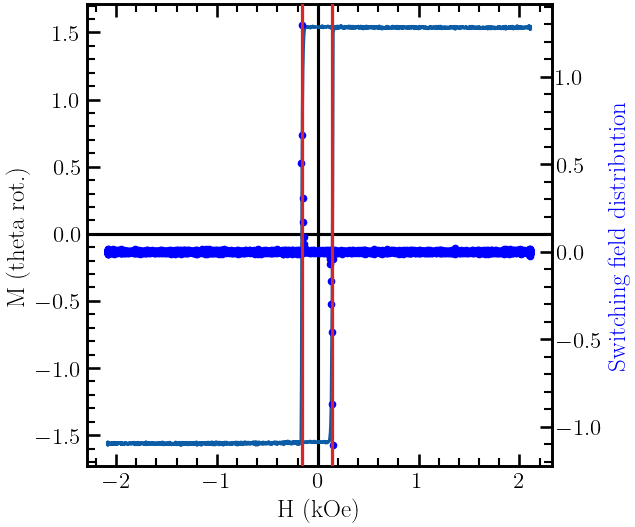

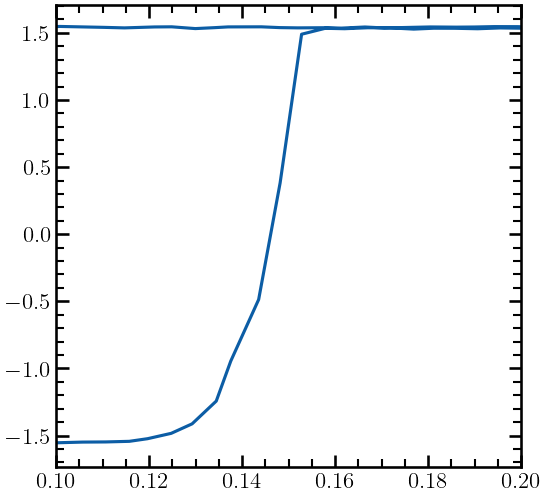

In [62]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
sns.set_palette('colorblind')

plt.style.use('science')
sns.set_context('talk')

folder = r'C:\Users\alexv\OneDrive - Imperial College London\Projects\Japan2024_May_KSAV\Japan_visit\P-AOMS\MOKE\AOMS-P-CoPtsinglelayer-reffilm-090524'
file = 'finersweep.csv'
path = os.path.join(folder, file)
def read_uMOKE_data(path):
    data = pd.read_csv(path,names=['time','theta','H_ad','M_ad','M_dc'], header = 22, encoding = 'latin1')
    #data_ref = pd.read_csv(path, header=2033,encoding='latin1')
    return(data)

def plot_MOKE(data, fig = None, ax = None, Hcs=None):
    if fig == None or ax == None:
        fig,ax = plt.subplots(1,1)
    #ax.plot(data['H Signal'], data[' M Signal'])
    field, magnetization = data['time'], -1*(data['M_ad']-np.mean(data['M_ad']))
    #m_sig = -1*(data['M_ad']-np.mean(data['M_ad'])) #-1*(data['M_ad'])#-1*(data['M_ad']-np.mean(data['M_ad']))
    ax.plot(field,magnetization,'-')
    if Hcs!=None:
        ax.axvline(Hcs['Hc1'], zorder = 10, color = 'tab:red')
        ax.axvline(Hcs['Hc2'],zorder = 10, color = 'tab:red')

def find_coercive_field(data):
    field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
    zero_crossings = np.where(np.diff(np.signbit(magnetization)))[0]
    print(zero_crossings)
    x1 = np.where(field[zero_crossings]<0)
    x2 = np.where(field[zero_crossings]>0)
    Hc1 = np.mean(field[zero_crossings[x1]])
    Hc2 = np.mean(field[zero_crossings[x2]])
    Hc1_std = np.std(field[zero_crossings[x1]])
    Hc2_std = np.std(field[zero_crossings[x2]])
    Hcs_summary = {'Hc1':Hc1,'Hc2':Hc2,'Hc1_std':Hc1_std,'Hc2_std':Hc2_std,
                   'Hc_mean':(Hc1-Hc2)/2, 'Hc_std':(Hc1+Hc2)/2}
    return(Hcs_summary)

def switching_field_distribution(data, fig = None, ax = None, Hcs=None):
    field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
    mag_diff = np.diff(magnetization)
    ax.plot(field[0:-1],mag_diff,'b.')
    if Hcs!=None:
        ax.axvline(Hcs['Hc1'], zorder = 10, color = 'tab:red')
        ax.axvline(Hcs['Hc2'],zorder = 10, color = 'tab:red')
    
data = read_uMOKE_data(path)
#print(data_ref)
print(data)

Hcs_sum = find_coercive_field(data)
print(Hcs_sum)
#print(data)
#print(data.columns)

fig,ax = plt.subplots(1,1, figsize = (6,6))
plot_MOKE(data,fig,ax, Hcs=Hcs_sum)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'b'
#color = 'tab:blue'
ax2.set_ylabel('Switching field distribution', color=color)  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color)
#ax2.tick_params(axis='y', labelcolor=color)
switching_field_distribution(data,fig,ax2, Hcs=Hcs_sum)
ax.axvline(0, zorder = -10, color = 'k')
ax.axhline(0,zorder = -10, color = 'k')
ax.set_xlabel('H (kOe)')
ax.set_ylabel('M (theta rot.)')
#ax.set_ylim(-2,2)
plt.show()

fig2,ax3 = plt.subplots(1,1,figsize = (6,6))
plot_MOKE(data,fig2,ax3, Hcs=None)
ax.set_xlabel('H (kOe)')
ax.set_ylabel('M (theta rot.)')
ax3.set_xlim(0.1,0.2)
plt.show()

          time     theta      H_ad      M_ad      M_dc
0     2.103057  0.112055  0.697299 -0.358854 -1.127184
1     2.103518  0.112076  0.697452 -0.355001 -1.127603
2     2.104209  0.111982  0.697681 -0.364004 -1.127527
3     2.102481  0.112115  0.697108 -0.352369 -1.126993
4     2.101444  0.112092  0.696765 -0.361906 -1.127069
...        ...       ...       ...       ...       ...
1995  2.109048  0.112243  0.699283 -0.359503 -1.114633
1996  2.109048  0.112236  0.699283 -0.355497 -1.114862
1997  2.109048  0.112183  0.699283 -0.356107 -1.115320
1998  2.109394  0.112124  0.699397 -0.361715 -1.114786
1999  2.109970  0.112127  0.699588 -0.357061 -1.114748

[2000 rows x 5 columns]
[ 498 1490]
{'Hc1': -0.1567904, 'Hc2': 0.1435423, 'Hc1_std': 0.0, 'Hc2_std': 0.0, 'Hc_mean': -0.15016635, 'Hc_std': -0.0066240499999999924}
[ 557 1547]


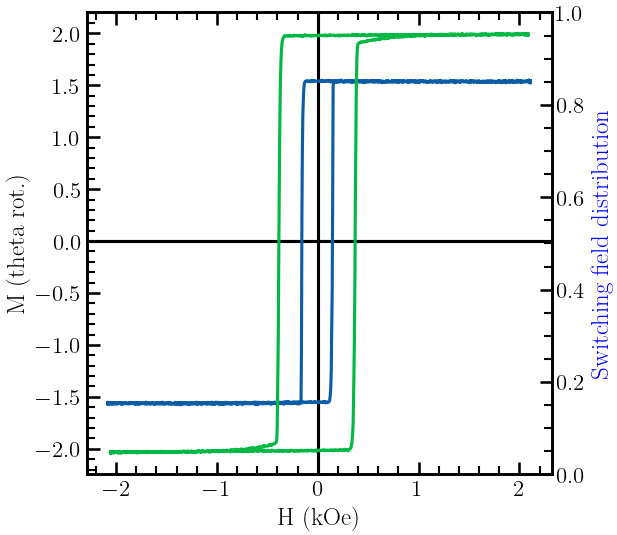

In [65]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
sns.set_palette('colorblind')

plt.style.use('science')
sns.set_context('talk')

folder = r'C:\Users\alexv\OneDrive - Imperial College London\Projects\Japan2024_May_KSAV\Japan_visit\P-AOMS\MOKE\AOMS-P-CoPtsinglelayer-reffilm-090524'
file = 'finersweep.csv'
path = os.path.join(folder, file)
def read_uMOKE_data(path):
    data = pd.read_csv(path,names=['time','theta','H_ad','M_ad','M_dc'], header = 22, encoding = 'latin1')
    #data_ref = pd.read_csv(path, header=2033,encoding='latin1')
    return(data)

def plot_MOKE(data, fig = None, ax = None, Hcs=None):
    if fig == None or ax == None:
        fig,ax = plt.subplots(1,1)
    #ax.plot(data['H Signal'], data[' M Signal'])
    field, magnetization = data['time'], -1*(data['M_ad']-np.mean(data['M_ad']))
    #m_sig = -1*(data['M_ad']-np.mean(data['M_ad'])) #-1*(data['M_ad'])#-1*(data['M_ad']-np.mean(data['M_ad']))
    ax.plot(field,magnetization,'-')
    if Hcs!=None:
        ax.axvline(Hcs['Hc1'], zorder = 10, color = 'tab:red')
        ax.axvline(Hcs['Hc2'],zorder = 10, color = 'tab:red')

def find_coercive_field(data):
    field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
    zero_crossings = np.where(np.diff(np.signbit(magnetization)))[0]
    print(zero_crossings)
    x1 = np.where(field[zero_crossings]<0)
    x2 = np.where(field[zero_crossings]>0)
    Hc1 = np.mean(field[zero_crossings[x1]])
    Hc2 = np.mean(field[zero_crossings[x2]])
    Hc1_std = np.std(field[zero_crossings[x1]])
    Hc2_std = np.std(field[zero_crossings[x2]])
    Hcs_summary = {'Hc1':Hc1,'Hc2':Hc2,'Hc1_std':Hc1_std,'Hc2_std':Hc2_std,
                   'Hc_mean':(Hc1-Hc2)/2, 'Hc_std':(Hc1+Hc2)/2}
    return(Hcs_summary)

def switching_field_distribution(data, fig = None, ax = None, Hcs=None):
    field, magnetization = data['time'], data['M_ad']-np.mean(data['M_ad'])
    mag_diff = np.diff(magnetization)
    ax.plot(field[0:-1],mag_diff,'b.')
    if Hcs!=None:
        ax.axvline(Hcs['Hc1'], zorder = 10, color = 'tab:red')
        ax.axvline(Hcs['Hc2'],zorder = 10, color = 'tab:red')
    
data = read_uMOKE_data(path)
#print(data_ref)
print(data)

Hcs_sum = find_coercive_field(data)
print(Hcs_sum)
#print(data)
#print(data.columns)

fig,ax = plt.subplots(1,1, figsize = (6,6))
plot_MOKE(data,fig,ax, Hcs=None)

folder = r'C:\Users\alexv\OneDrive - Imperial College London\Projects\Japan2024_May_KSAV\Japan_visit\P-AOMS\MOKE'
file = 'AOMS-CoPtsinglelayer-020424-MOKE.csv'
path = os.path.join(folder, file)

data2 = read_uMOKE_data(path)
hc_sum2 = find_coercive_field(data2)

plot_MOKE(data2,fig,ax, Hcs=None)


ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'b'
#color = 'tab:blue'
ax2.set_ylabel('Switching field distribution', color=color)  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color)
#ax2.tick_params(axis='y', labelcolor=color)
#switching_field_distribution(data,fig,ax2, Hcs=Hcs_sum)
ax.axvline(0, zorder = -10, color = 'k')
ax.axhline(0,zorder = -10, color = 'k')
ax.set_xlabel('H (kOe)')
ax.set_ylabel('M (theta rot.)')
#ax.set_ylim(-2,2)
plt.show()

